In [3]:
import pandas as pd
import matplotlib.pyplot as plt


In [12]:
data = pd.read_csv("inpatientCharges.csv")
data.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$32963.07,$5777.24,$4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$15131.85,$5787.57,$4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$37560.37,$5434.95,$4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,$13998.28,$5417.56,$4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,$31633.27,$5658.33,$4851.44


In [13]:
#EDA

print(data.columns)
# remove provider id
data = data.drop("Provider Id", axis=1)

Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       ' Total Discharges ', ' Average Covered Charges ',
       ' Average Total Payments ', 'Average Medicare Payments'],
      dtype='object')


In [14]:
# split DRG definition
data[["procedure_code","procedure_name"]] = data["DRG Definition"].str.split(" - ", expand=True)

data[" Average Covered Charges "] = data[" Average Covered Charges "].str.replace("$","")
data[" Average Total Payments "] = data[" Average Total Payments "].str.replace("$","")
data["Average Medicare Payments"] = data["Average Medicare Payments"].str.replace("$","")
data= data.astype({"procedure_code":"int64"," Total Discharges ": "int64", " Average Covered Charges ": "float32", " Average Total Payments ":"float32", "Average Medicare Payments": "float32"})
data = data.drop("DRG Definition", axis=1)
data.head()

,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,procedure_code,procedure_name
0,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.070312,5777.240234,4763.729980,39,EXTRACRANIAL PROCEDURES W/O CC/MCC
1,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.849609,5787.569824,4976.709961,39,EXTRACRANIAL PROCEDURES W/O CC/MCC
2,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.371094,5434.950195,4453.790039,39,EXTRACRANIAL PROCEDURES W/O CC/MCC
3,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.280273,5417.560059,4129.160156,39,EXTRACRANIAL PROCEDURES W/O CC/MCC
4,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.269531,5658.330078,4851.439941,39,EXTRACRANIAL PROCEDURES W/O CC/MCC


In [15]:
# bar plot for avg covered charges and procedure name
avg_total_payments = data.groupby(["procedure_name"])[" Average Total Payments "].mean()
#print(avg_total_payments)
avg_total_payments = avg_total_payments.sort_values(ascending=False)
avg_total_payments = avg_total_payments.head(10)
avg_total_payments

procedure_name
SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS                              44259.484375
INFECTIOUS & PARASITIC DISEASES W O.R. PROCEDURE W MCC                  40315.960938
RESPIRATORY SYSTEM DIAGNOSIS W VENTILATOR SUPPORT 96+ HOURS             38588.921875
MAJOR SMALL & LARGE BOWEL PROCEDURES W MCC                              37765.593750
SPINAL FUSION EXCEPT CERVICAL W/O MCC                                   27778.669922
PERC CARDIOVASC PROC W DRUG-ELUTING STENT W MCC OR 4+ VESSELS/STENTS    23326.337891
OTHER VASCULAR PROCEDURES W MCC                                         22845.638672
MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W MCC        22531.261719
MAJOR CARDIOVASC PROCEDURES W/O MCC                                     21948.544922
HIP & FEMUR PROCEDURES EXCEPT MAJOR JOINT W MCC                         20984.365234
Name:  Average Total Payments , dtype: float32

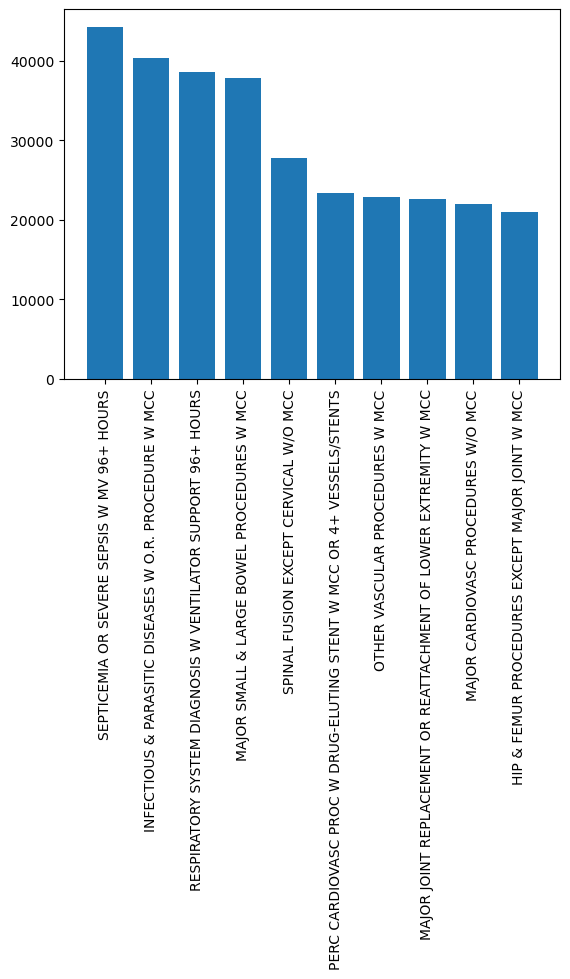

<Figure size 1500x1000 with 0 Axes>

In [26]:
#bar plot
plt.bar(avg_total_payments.index, avg_total_payments)
plt.tick_params(axis="x",rotation=90)
plt.figure(figsize=(15,10))
plt.show()

In [29]:
#payment collected by top 5 states
state_payment = data.groupby(["Provider State"])[" Average Total Payments "].sum()
state_payment_sorted = state_payment.sort_values(ascending=False)
state_payment_sorted.head()


Provider State
CA    164993984.0
TX    109670576.0
NY    108259024.0
FL     98465080.0
IL     77434456.0
Name:  Average Total Payments , dtype: float32

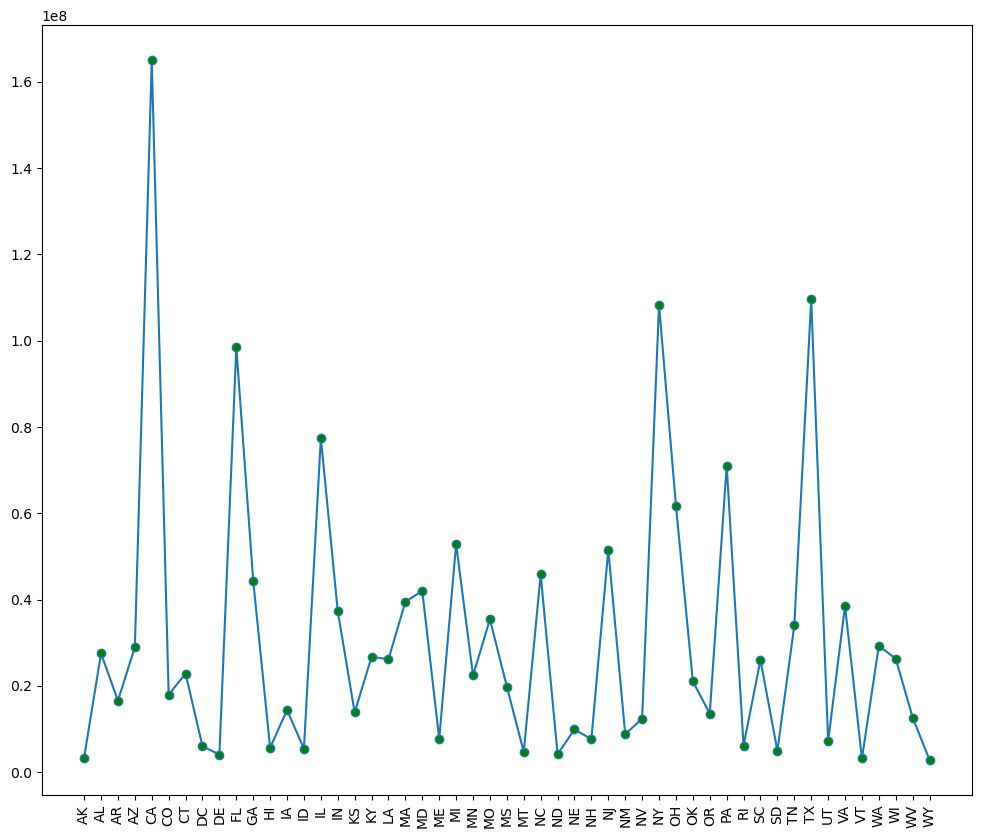

In [38]:
#trend chart
plt.figure(figsize=(12,10))
plt.tick_params(axis="x",rotation=90)
plt.plot(state_payment.index,state_payment,marker="o",mfc="green")
plt.show()

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not [['blue'], ['red']]

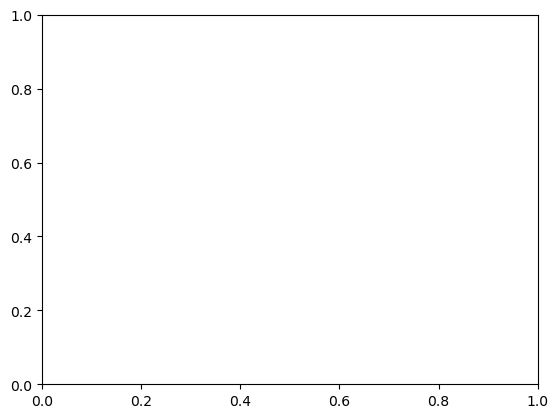

In [49]:
#scatter plot
plt.scatter(data[" Total Discharges "],data[" Average Total Payments "],c=[["blue"],["red"]],cmap="Sequential")
plt.xlabel("discharges")
plt.ylabel("total payments")
plt.show()